# Interpolation Schemes

## Linear interpolation

Interpolate (r,g,b) colors within an interval $[x_1,x_2]$ assuming the color in $x_1$ is red and in $x_2$ is blue.

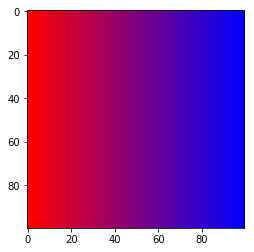

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def linear_interp(n,x,f):
    # n is the number of discretization points
    # [x[0],x[1]] defines the interval extremes
    # f[0] nad f[1] are the (r,g,b) colors in x[0] and x[1]
    
    t = np.linspace(x[0],x[1],n)
    cof0 = np.linspace(0,1,n)
    cof1 = np.linspace(1,0,n)

    # r = ? (implement this bit)
    r = f[0][:,np.newaxis].dot(cof1[np.newaxis,:])+f[1][:,np.newaxis].dot(cof0[np.newaxis,:])
    r = r.T

    return(np.asarray(r,dtype=float))

n = 100 # discretization size

x = np.asarray([0,1],dtype=float)
f = np.asarray([[1,0,0],[0,0,1]],dtype=float)
f_linear = linear_interp(n,x,f)

# generating a 2D image where the rows are copies of f_linear
f2d_linear = np.zeros((n,n,3))
f2d_linear[:] = f_linear
#a_linear = Image.fromarray(f2d_linear.astype('uint8'), 'RGB')
#a_linear.show()
plt.imshow(f2d_linear)

----
## Bilinear interpolation

Interpolate (r,g,b) colors within an square with corners $[x_1,y_1],[x_2,y_1],[x_1,y_2],[x_2,y_2]$ assuming the colors in corners 
$$
\begin{eqnarray}
f([x_1,y_1])=(0,0,0)\\
f([x_2,y_1])=(1,0,0)\\
f([x_1,y_2])=(0,0,1)\\
f([x_2,y_2])=(1,1,0)
\end{eqnarray}
$$

(100, 3)


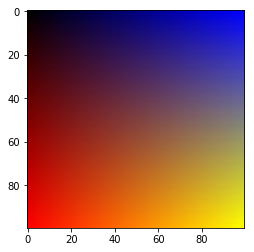

In [31]:
# Solution 1 
# Using the linear_interp()

# defining the corners
x = np.asarray([0,1],dtype=float)
y = np.asarray([0,1],dtype=float)
f = np.asarray([[0,0,0],[1,0,0],[0,0,1],[1,1,0]],dtype=float)

# Use the linear_interp() function here to implement a bilinear interpolation
x0_linear = linear_interp(n,x,[f[0],f[2]])
x1_linear = linear_interp(n,x,[f[1],f[3]])
print(x0_linear.shape)
f_bilinear = np.zeros((n,n,3))
for i in range(n):
    f_bilinear[:,i,:] = linear_interp(n,x,[x0_linear[i,:],x1_linear[i,:]])

plt.imshow(f_bilinear)


In [41]:
# Solution 2 
# Using the bilinear_formula()

def bilinear_interp(n,m,x,y,f):
    tx = np.linspace(x[0],x[1],n)
    ty = np.linspace(y[0],y[1],m)
    
    F = np.asarray([[f[0],f[2]],[f[1],f[3]]])
    def bilinear_formula(i,j):
        # implement the formula given in the lecture slides here
        t1 = np.asarray([x[1]-i,i-x[0]])
        t2 = np.asarray([y[1]-j,j-y[0]])
        print(t1.shape)
        print(t2.shape)
        print((t1[:,np.newaxis,np.newaxis].dot(F).dot(t2[np.newaxis,:,newaxis])).shape)
        return (1/(x[1]-x[0])(y[1]-y[0]))*t1[:,np.newaxis].dot(F).dot(t2[np.newaxis,:])
    bilinear_formula(0.3,0.7)
    # return an array of shape n x n x 3

# defining the corners
x = np.asarray([0,1],dtype=float)
y = np.asarray([0,1],dtype=float)
f = np.asarray([[0,0,0],[1,0,0],[0,0,1],[1,1,0]],dtype=float)

f2_bilinear = bilinear_interp(n,n,x,y,f)
a2_bilinear = Image.fromarray(f2_bilinear.astype('uint8'), 'RGB')
a2_bilinear.show()

(2,)
(2,)


ValueError: shapes (2,1,1) and (2,2,3) not aligned: 1 (dim 2) != 2 (dim 1)

### Why are the colors rotated in the two previous solutions?

----
## Baricentric coordinates

Suppose the square in the previous exercise is split in two triangles $[x_1,y_1],[x_2,y_1],[x_2,y_2]$ and $[x_2,y_2],[x_1,y_2],[x_1,y_1]$. Compute the baricentric interpolation within each triangle and generate an image.

In [ ]:
# this one is a bit tricky